In [1]:
# imports
from typing import List
from datetime import datetime

import cv2
import os
import re
import requests
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# constants
VALID_CHAR_REGEX = "[A-Z0-9]"
VALID_CHAR_CZECH_REGEX = "[a-zA-ZáčďéěíňóřšťúůýžÁČĎÉĚÍŇÓŘŠŤÚŮÝŽ]" # czech lang
VALID_CHAR_POLISH_REGEX = "[a-zA-ZąćęłńóśżźĄĆĘŁŃÓŚŻŹ]" # polish lang
VALID_CHAR_GERMAN_REGEX = "[a-zA-ZÄäÖöÜüẞß]" # german lang
VALID_CHAR_ENGLISH_REGEX = "[a-zA-Z]"
INVALID_CHAR_REGEX = "[.,()«»?!-—:;…]"

VALID_CHAR_PUNC_REGEX = "[a-zA-Z0-9/=ąćęłńóśżźĄĆĘŁŃÓŚŻŹáčďéěíňóřšťúůýžÁČĎÉĚÍŇÓŘŠŤÚŮÝŽÄäÖöÜüẞß]"
PUNCT_REGEX = "[=]"

In [3]:
# update these values to change text input for the program
WOJNICZ_INPUT_FILE = "inputs\\wojnicz.txt"
REAL_INPUT_FILE = "inputs\\pan-tadeusz.txt"

In [4]:
# def function: save list of strings to file, separated by newlines
def save_to_file(input: List[str], path: str):
    file = open(path, "w")
    for line in input[:-1]:
        file.write(line + "\n")
    file.write(input[-1])
    file.close()

In [5]:
def plot_occ(input):
    # generate occurance count graph
    plt.plot(range(200), list(input.values())[:200], 'o', color='#8888ff')
    plt.xlabel("Bigram index")
    plt.ylabel("Number of bigrams appearing in the text")
    # save plot to file and show
    #if filename == "":
    #    filename = datetime.now().strftime("%Y%m%d-%H%M%S")
    #plt.savefig("outputs\\occurance_" + filename + ".png")
    plt.show()

In [6]:
# open text prepared in connetwork file
text = open("words_punc.txt", 'r').read().split("\n")

In [7]:
def find_bigrams(text):
    bigrams = []
    for i, word in enumerate(text):
        if i<len(text)-1:
            if not re.match(PUNCT_REGEX, word) and not re.match(PUNCT_REGEX, text[i+1]):
                bigrams.append((word, text[i+1]))
    return bigrams

bigrams = find_bigrams(text)
bigrams

[('FGAG2', 'GDAE'),
 ('GDAE', 'AR'),
 ('AR', 'GHAM'),
 ('GHAM', 'SOE'),
 ('SOE', 'SORG'),
 ('SORG', '0D0RC2'),
 ('0D0RC2', 'GDOR'),
 ('GDOR', 'SOE8G'),
 ('SOE8G', '2ORG'),
 ('2ORG', 'DZAR'),
 ('DZAR', 'ORG'),
 ('ORG', 'DAIR'),
 ('DAIR', 'THAM'),
 ('THAM', 'SOR'),
 ('SOR', 'AR'),
 ('AR', 'HZAR'),
 ('HZAR', 'HZAR'),
 ('HZAR', '8ALA'),
 ('8ALA', '2GAIIR'),
 ('2GAIIR', 'SCDG'),
 ('SCDG', 'OR'),
 ('OR', 'GDAM'),
 ('GDAM', 'SO8'),
 ('SO8', 'HZOARG'),
 ('HZOARG', 'HZC2'),
 ('HZC2', '8ARAM'),
 ('8ARAM', '2G'),
 ('2G', '0OM'),
 ('0OM', 'OHCCG'),
 ('OHCCG', 'OHCAR'),
 ('OHCAR', 'ROEOHG'),
 ('ROEOHG', 'HZAAR'),
 ('HZAAR', '8AM'),
 ('8AM', 'ODAM'),
 ('ODAM', 'OR'),
 ('OR', 'ODAL'),
 ('ODAL', '2AIRG'),
 ('2AIRG', 'TCAR'),
 ('TCAR', 'HZAM'),
 ('HZAM', 'PZAR'),
 ('PZAR', 'FZAM'),
 ('O8AR', 'SG'),
 ('SG', 'SOE'),
 ('SOE', 'PZOG'),
 ('PZOG', 'OG8AR'),
 ('OG8AR', 'S'),
 ('S', '2'),
 ('2', 'FZOAM'),
 ('FZOAM', 'SO8ARG'),
 ('SO8ARG', 'GSCG'),
 ('GSCG', 'SO8G'),
 ('SO8G', 'ODTO'),
 ('ODTO', 'G'),
 ('G', 'O

In [8]:
def count_occurance(bigrams):
    bigrams_count = {}
    for bigram in bigrams:
        if bigram in bigrams_count.keys():
            bigrams_count[bigram] += 1
        else:
            bigrams_count[bigram] = 1

    bigrams_count = dict(sorted(bigrams_count.items(), key=lambda item: item[1], reverse=True))
    return bigrams_count

In [9]:
bigrams_count = count_occurance(bigrams)
bigrams_count

{('TOE', '8AM'): 30,
 ('TOE', 'TOE'): 19,
 ('8AM', '8AM'): 12,
 ('8AM', 'HZG'): 11,
 ('TOR', '8AM'): 10,
 ('TG', '8AM'): 9,
 ('SOE', '8AM'): 9,
 ('TOR', 'TOE'): 8,
 ('TOE', 'SOE'): 8,
 ('8AM', 'HZOR'): 8,
 ('8AM', 'SO'): 7,
 ('TOE', 'TOR'): 7,
 ('8AM', '8AE'): 7,
 ('OR', 'AM'): 7,
 ('8AM', 'TOE'): 7,
 ('TOE', 'HZOE'): 6,
 ('8AM', 'HZOE'): 6,
 ('HZG', '8AM'): 6,
 ('8AM', 'TOR'): 6,
 ('OHOE', 'TOE'): 6,
 ('8AN', '8AM'): 6,
 ('8AM', '8AN'): 6,
 ('TG', 'DTG'): 6,
 ('8AM', '8AK'): 6,
 ('SG', '8AM'): 6,
 ('8AM', 'SOR'): 5,
 ('4ODOE', '8AM'): 5,
 ('TOR', 'TOR'): 5,
 ('HZOE', 'TOE'): 5,
 ('8G', '8AM'): 5,
 ('SOR', '8AM'): 5,
 ('8AM', 'TG'): 5,
 ('8G', '8G'): 5,
 ('TOE', 'HZG'): 5,
 ('8AM', '4ODTG'): 5,
 ('4ODG', '8AM'): 5,
 ('8AM', '8G'): 5,
 ('OHOE', '8AM'): 5,
 ('8AM', 'OR'): 5,
 ('8AM', '2'): 5,
 ('TG', 'TG'): 5,
 ('8AM', 'ODAM'): 4,
 ('HZOE', '8AM'): 4,
 ('8AR', 'TCG'): 4,
 ('TOR', 'TG'): 4,
 ('2', 'AM'): 4,
 ('8AM', 'THZG'): 4,
 ('TOE', 'TO8G'): 4,
 ('8OR', 'TOE'): 4,
 ('TOE', 'TG'): 4,
 

## Compare with real-world language

In [10]:
#open text
text_real = open("words_real_punc.txt", 'r').read().split("\n")

In [11]:
bigrams_real = find_bigrams(text_real)

In [12]:
bigrams_real_count = count_occurance(bigrams_real)
def show_bigrams(dict):
    print("The most common bigrams occurring in this text:")
    for x in dict.keys():
        if(dict[x] > 5):
            big = x[0] + ' ' + x[1]
            print("\"" +big + "\": " + str(dict[x]))

In [13]:
show_bigrams(bigrams_count)

The most common bigrams occurring in this text:
"TOE 8AM": 30
"TOE TOE": 19
"8AM 8AM": 12
"8AM HZG": 11
"TOR 8AM": 10
"TG 8AM": 9
"SOE 8AM": 9
"TOR TOE": 8
"TOE SOE": 8
"8AM HZOR": 8
"8AM SO": 7
"TOE TOR": 7
"8AM 8AE": 7
"OR AM": 7
"8AM TOE": 7
"TOE HZOE": 6
"8AM HZOE": 6
"HZG 8AM": 6
"8AM TOR": 6
"OHOE TOE": 6
"8AN 8AM": 6
"8AM 8AN": 6
"TG DTG": 6
"8AM 8AK": 6
"SG 8AM": 6


In [14]:
show_bigrams(bigrams_real_count)

The most common bigrams occurring in this text:
"SIĘ W": 76
"I Z": 72
"SIĘ Z": 67
"SIĘ I": 60
"I W": 55
"SIĘ NA": 45
"I NA": 39
"CO SIĘ": 38
"I TAK": 36
"NA TO": 30
"ZA NIM": 29
"O TYM": 29
"NA KONIEC": 29
"SIĘ DO": 27
"ŻE SIĘ": 27
"SIĘ NIE": 26
"JAK GDYBY": 26
"W DOMU": 25
"Z NIM": 25
"JAK W": 24
"NA KSZTAŁT": 23
"W TYM": 22
"A NA": 22
"I NIE": 22
"ŻE W": 21
"Z WOLNA": 21
"NIE JEST": 21
"NIC NIE": 21
"W RĘKU": 20
"W ŚRODKU": 19
"Z TYŁU": 19
"NIE MÓGŁ": 18
"U NAS": 18
"PAN SĘDZIA": 18
"NIE MA": 18
"W LITWIE": 18
"NA ŚWIECIE": 18
"A W": 17
"Z GÓRY": 17
"DO GÓRY": 17
"WIDAĆ ŻE": 16
"SIĘ JAK": 16
"NIE BYŁO": 16
"I PO": 16
"JAK NA": 16
"BYŁ TO": 16
"W KOŃCU": 16
"ŻE TO": 16
"CO TO": 16
"BYŁ W": 15
"I RZEKŁ": 15
"TAK SIĘ": 15
"Z SOBĄ": 15
"SIĘ ŻE": 15
"TO JEST": 15
"W GÓRĘ": 15
"AŻ DO": 14
"NIGDY NIE": 14
"I JUŻ": 14
"JUŻ NIE": 14
"SIĘ PO": 14
"W TYŁ": 14
"NA LITWIE": 14
"CZY TO": 14
"I DO": 14
"DO DOMU": 13
"W TEJ": 13
"TO NIE": 13
"Z NICH": 13
"A POTEM": 13
"ŻE GO": 13
"W POLE": 13
"ŻE Z"

## Graphs for number of bigrams in each language
First graph corresponds to the language scripted
in Voynich's Manuscript, while the second,
to a real world spoken language.

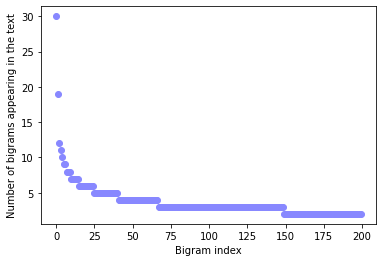

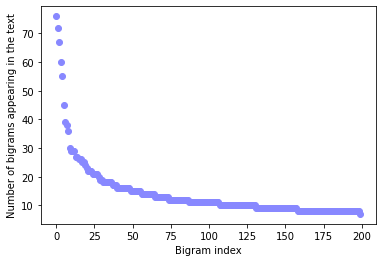

In [15]:
plot_occ(bigrams_count)
plot_occ(bigrams_real_count)